# **Problem** **1**

In [0]:
from sklearn.datasets import fetch_openml

In [0]:
data = fetch_openml(data_id=40926) # get CIFAR-10 data from OpenML

In [0]:
print(data)

{'data': array([[ 59.,  43.,  50., ..., 140.,  84.,  72.],
       [154., 126., 105., ..., 139., 142., 144.],
       [255., 253., 253., ...,  83.,  83.,  84.],
       ...,
       [ 20.,  19.,  15., ...,  50.,  53.,  47.],
       [ 25.,  15.,  23., ...,  80.,  81.,  80.],
       [ 73.,  98.,  99., ...,  94.,  58.,  26.]]), 'target': array(['6', '9', '9', ..., '5', '1', '7'], dtype=object), 'frame': None, 'feature_names': ['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30', 'a31', 'a32', 'a33', 'a34', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40', 'a41', 'a42', 'a43', 'a44', 'a45', 'a46', 'a47', 'a48', 'a49', 'a50', 'a51', 'a52', 'a53', 'a54', 'a55', 'a56', 'a57', 'a58', 'a59', 'a60', 'a61', 'a62', 'a63', 'a64', 'a65', 'a66', 'a67', 'a68', 'a69', 'a70', 'a71', 'a72', 'a73', 'a74', 'a75', 'a76', 'a77', 'a78', 'a79', 'a80', 'a81', 'a82', 'a83'

# **Problem** **2**

# **Problem** **3**

# **Problem** **4**

# **Problem** **5**

**Pytorch Tutorial**

In [0]:
from __future__ import print_function
import torch

In [0]:
x = torch.empty(5, 3)
print(x)

tensor([[-1.5552e-01,  0.0000e+00,  4.4842e-44],
        [ 0.0000e+00,         nan,  0.0000e+00],
        [ 2.6251e-09,  1.3733e-05,  4.2011e-05],
        [ 4.2491e-05,  3.3429e+21,  5.3934e-05],
        [ 2.1782e-04,  1.6838e+22,  0.0000e+00]])


In [0]:
x = torch.rand(5, 3)
print(x)

tensor([[0.1194, 0.3407, 0.5182],
        [0.7104, 0.6167, 0.9554],
        [0.4909, 0.9780, 0.0206],
        [0.0160, 0.3529, 0.6266],
        [0.2853, 0.6049, 0.2395]])


In [0]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [0]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [0]:
x = x.new_ones(5, 3, dtype=torch.double)
print(x)

x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.2334,  1.1119,  0.0848],
        [ 1.0386, -0.6702,  1.5898],
        [-1.5128, -0.1279,  1.9291],
        [ 1.5583,  0.4790, -0.3507],
        [-0.4396,  0.8310, -0.1686]])


In [0]:
print(x.size())

torch.Size([5, 3])


In [0]:
y = torch.rand(5, 3)
print(x + y)

tensor([[-0.2058,  1.3123,  1.0061],
        [ 1.8051, -0.1640,  1.9518],
        [-0.6625,  0.3585,  2.2083],
        [ 2.5186,  1.4590, -0.0456],
        [-0.0410,  1.4877,  0.7460]])


In [0]:
print(torch.add(x, y))

tensor([[-0.2058,  1.3123,  1.0061],
        [ 1.8051, -0.1640,  1.9518],
        [-0.6625,  0.3585,  2.2083],
        [ 2.5186,  1.4590, -0.0456],
        [-0.0410,  1.4877,  0.7460]])


In [0]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[-0.2058,  1.3123,  1.0061],
        [ 1.8051, -0.1640,  1.9518],
        [-0.6625,  0.3585,  2.2083],
        [ 2.5186,  1.4590, -0.0456],
        [-0.0410,  1.4877,  0.7460]])


In [0]:
y.add_(x)
print(y)

tensor([[-0.2058,  1.3123,  1.0061],
        [ 1.8051, -0.1640,  1.9518],
        [-0.6625,  0.3585,  2.2083],
        [ 2.5186,  1.4590, -0.0456],
        [-0.0410,  1.4877,  0.7460]])


In [0]:
print(x[:,1])

tensor([ 1.1119, -0.6702, -0.1279,  0.4790,  0.8310])


In [0]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [0]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.7712])
0.7711711525917053


In [0]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [0]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [0]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [0]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [0]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

tensor([1.7712], device='cuda:0')
tensor([1.7712], dtype=torch.float64)


**MNIST Tutorial**

In [0]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not(PATH / FILENAME).exists():
  content = requests.get(URL + FILENAME).content
  (PATH / FILENAME).open("wb").write(content)

In [0]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
  ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


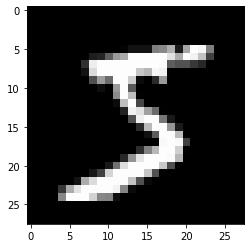

In [0]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [0]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [0]:
def log_softmax(x):
  return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
  return log_softmax(xb @ weights + bias)

In [0]:
bs = 64 # batch size

xb = x_train[0:bs] # a mini batch from x
preds = model(xb) # predictions
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.2112, -2.7084, -2.5220, -2.3708, -2.3598, -1.8463, -2.6530, -2.1883,
        -2.1134, -2.3597], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [0]:
def nll(input, target):
  return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [0]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.3629, grad_fn=<NegBackward>)


In [0]:
def accuracy(out, yb):
  preds = torch.argmax(out, dim=1)
  return(preds == yb).float().mean()

In [0]:
print(accuracy(preds, yb))

tensor(0.0312)


In [0]:
from IPython.core.debugger import set_trace

lr = 0.5 # learning rate
epochs = 2 # how many epochs to train for

for epoc in range(epochs):
  for i in range((n - 1) // bs + 1):
    # set_trace() # uncomment this to try out debugger
    start_i = i * bs
    end_i = start_i + bs
    xb = x_train[start_i:end_i]
    yb = y_train[start_i:end_i]
    pred = model(xb)
    loss = loss_func(pred, yb)

    loss.backward()
    with torch.no_grad():
      weights -= weights.grad * lr
      bias -= bias.grad * lr
      weights.grad.zero_()
      bias.grad.zero_()

In [0]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0809, grad_fn=<NegBackward>) tensor(1.)


In [0]:
import torch.nn.functional as F

loss_func = F.cross_entropy

def model(xb):
  return xb @ weights + bias

In [0]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0809, grad_fn=<NllLossBackward>) tensor(1.)


In [0]:
from torch import nn

class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb):
        return xb @ self.weights + self.bias

In [0]:
model = Mnist_Logistic()

In [0]:
print(loss_func(model(xb), yb))


tensor(2.4052, grad_fn=<NllLossBackward>)


In [0]:
with torch.no_grad():
    for p in model.parameters(): p -= p.grad * lr
    model.zero_grad()

TypeError: ignored

In [0]:
def fit():
  for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
      start_i = i * bs
      end_i = start_i + bs
      xb = x_train[start_i: end_i]
      yb = y_train[start_i: end_i]
      pred = model(xb)
      loss = loss_func(pred, yb)

      loss.backward()
      with torch.no_grad():
        for p in model.parameters():
          p -= p.grad * lr
        model.zero_grad()
fit()

In [0]:
print(loss_func(model(xb), yb))

tensor(0.0816, grad_fn=<NllLossBackward>)


In [0]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lin(xb)

In [0]:
model = Mnist_Logistic()
print(loss_func(model(xb), yb))

tensor(2.3486, grad_fn=<NllLossBackward>)


In [0]:
fit()
print(loss_func(model(xb), yb))

tensor(0.0808, grad_fn=<NllLossBackward>)


In [0]:
from torch import optim

In [0]:
def get_model():
  model = Mnist_Logistic()
  return model, optim.SGD(model.parameters(), lr=lr)

model, opt = get_model()
print(loss_func(model(xb), yb))

for epoch in range(epochs):
  for i in range((n - 1) // bs + 1):
    start_i = i * bs
    end_i = start_i + bs
    xb = x_train[start_i: end_i]
    yb = y_train[start_i: end_i]
    pred = model(xb)
    loss = loss_func(pred, yb)

    loss.backward()
    opt.step()
    opt.zero_grad()

print(loss_func(model(xb), yb))

tensor(2.2887, grad_fn=<NllLossBackward>)
tensor(0.0825, grad_fn=<NllLossBackward>)


In [0]:
from torch.utils.data import TensorDataset

In [0]:
model, opt = get_model()

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        xb, yb = train_ds[i * bs: i * bs + bs]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

print(loss_func(model(xb), yb))

tensor(0.0818, grad_fn=<NllLossBackward>)


In [0]:
from torch.utils.data import DataLoader

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs)

In [0]:
for xb, yb in train_dl:
  pred = model(xb)

In [0]:
model, opt = get_model()

for epoch in range(epochs):
  for xb, yb in train_dl:
    pred = model(xb)
    loss = loss_func(pred, yb)

    loss.backward()
    opt.step()
    opt.zero_grad()

print(loss_func(model(xb), yb))

tensor(0.0804, grad_fn=<NllLossBackward>)


In [0]:
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

In [0]:
model, opt = get_model()

for epoch in range(epochs):
    model.train()
    for xb, yb in train_dl:
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

    model.eval()
    with torch.no_grad():
        valid_loss = sum(loss_func(model(xb), yb) for xb, yb in valid_dl)

    print(epoch, valid_loss / len(valid_dl))

0 tensor(0.3042)
1 tensor(0.2817)


In [0]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

In [0]:
import numpy as np

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)

In [0]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [53]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

NameError: ignored

In [0]:
class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

lr = 0.1

In [0]:
model = Mnist_CNN()
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.3436611232995987
1 0.22426221685409545


In [0]:
class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)


def preprocess(x):
    return x.view(-1, 1, 28, 28)

In [0]:
model = nn.Sequential(
    Lambda(preprocess),
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AvgPool2d(4),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.35687828962802887
1 0.25747167279720307


In [0]:
def preprocess(x, y):
    return x.view(-1, 1, 28, 28), y


class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))

train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

In [0]:
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [0]:
fit(epochs, model, loss_func, opt, train_dl, valid_dl)


0 0.3401533676624298
1 0.23293600144386292


In [0]:
print(torch.cuda.is_available())


True


In [0]:
dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")

In [0]:
def preprocess(x, y):
    return x.view(-1, 1, 28, 28).to(dev), y.to(dev)


train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

In [0]:
model.to(dev)
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [0]:
fit(epochs, model, loss_func, opt, train_dl, valid_dl)


0 0.1917406521320343
1 0.18984941139221193


<b>Our Attempt</b>

In [19]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [20]:
# hyper parameters
n_epochs = 4
bs_train = 64
bs_test = 1000
lr = 0.3
momentum = 0.5
log_interval = 5

random_seed = 42
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [21]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=bs_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=bs_test, shuffle=True)

In [22]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.lin_layer = nn.Linear(320, 50, bias=False)

  def forward(self, x):
    x = F.relu(F.avg_pool2d(self.conv1(x), 2))
    x = F.relu(F.avg_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.lin_layer(x))
    x = F.dropout(x, training=self.training)
    return F.log_softmax(x)

MNIST_CNN = CNN()
MNIST_optimizer = optim.SGD(MNIST_CNN.parameters(), lr=lr, momentum=momentum)

In [23]:
MNIST_CNN = CNN()
MNIST_optimizer = optim.SGD(MNIST_CNN.parameters(), lr=lr, momentum=momentum)

In [24]:
def train(epoch):
  MNIST_CNN.train()
  for batch_index, (data, target) in enumerate(train_loader):
    MNIST_optimizer.zero_grad()
    output = MNIST_CNN(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    MNIST_optimizer.step()

In [25]:
def test():
  MNIST_CNN.eval()
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = MNIST_CNN(data)
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  print('Accuracy: {}%\n'.format(
    100. * correct / len(test_loader.dataset)))

In [ ]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Accuracy: 0.029999999329447746%

Accuracy: 92.01000213623047%

Accuracy: 94.55000305175781%

Accuracy: 94.33000183105469%



**Our accuracy is around 94%.**

# **Problem** **6**